In [100]:
import pyarrow.parquet as pq
import pandas as pd

In [102]:
data = pd.read_parquet(prom_file_path)

In [113]:
data = data[data['node'] == 'r11n5']
data.head()

,id,timestamp,node,node_time_seconds,node_load15,surfsara_power_usage,up,node_netstat_Tcp_OutSegs,node_netstat_Tcp_InErrs,node_context_switches_total,...,nvidia_gpu_duty_cycle-mean,nvidia_gpu_duty_cycle-max,node_network_transmit_packets_total-sum,node_udp_queues-sum,node_network_receive_bytes_total-sum,node_network_receive_packets_total-sum,node_network_receive_multicast_total-sum,node_disk_io_now-sum,node_rapl_package_joules_total-sum,node_network_receive_drop_total-sum
37,24749926,2022-08-01 23:00:30,r11n5,1.659390e+09,1.0,92.0,1.0,5.296870e+09,0.0,3.664210e+10,...,NaN,NaN,5.314873e+09,0.0,2.371412e+13,5.281624e+09,2.0,0.0,142929.88,0.0
121,24749927,2022-08-01 23:01:00,r11n5,1.659390e+09,1.0,92.0,1.0,5.296870e+09,0.0,3.664210e+10,...,NaN,NaN,5.314873e+09,0.0,2.371412e+13,5.281624e+09,2.0,0.0,144534.31,0.0
205,24749928,2022-08-01 23:01:30,r11n5,1.659390e+09,1.0,92.0,1.0,5.296870e+09,0.0,3.664210e+10,...,NaN,NaN,5.314873e+09,0.0,2.371412e+13,5.281624e+09,2.0,0.0,146138.92,0.0
289,24749929,2022-08-01 23:02:00,r11n5,1.659390e+09,1.0,92.0,1.0,5.296870e+09,0.0,3.664210e+10,...,NaN,NaN,5.314873e+09,0.0,2.371412e+13,5.281624e+09,2.0,0.0,147744.08,0.0
373,24749930,2022-08-01 23:02:30,r11n5,1.659390e+09,1.0,92.0,1.0,5.296870e+09,0.0,3.664210e+10,...,NaN,NaN,5.314873e+09,0.0,2.371412e+13,5.281624e+09,2.0,0.0,149348.27,0.0


In [114]:
# Assuming df is your DataFrame and 'time' is your datetime column
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create an 'hour' column
data['hour'] = data['timestamp'].dt.hour

# Group by the 'hour' column and calculate the mean power usage
df_hourly = data.groupby('hour')['surfsara_power_usage'].mean().reset_index()


In [115]:
import pandas as pd


data['hour'] = data['timestamp'].dt.hour

df_hourly = data.groupby('hour')['surfsara_power_usage'].sum().reset_index()



In [117]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Define your date range
start_date = '2022-08-03 09:00:00'
end_date = '2022-08-04 09:00:00'

# Create a mask that selects only the dates within your range
mask = (data['timestamp'] >= start_date) & (data['timestamp'] <= end_date)

# Apply the mask to your dataframe to get only the rows within your date range
data = data.loc[mask]

# data = data.loc['2022-08-09 09:00:00':'2022-08-15 09:00:00']

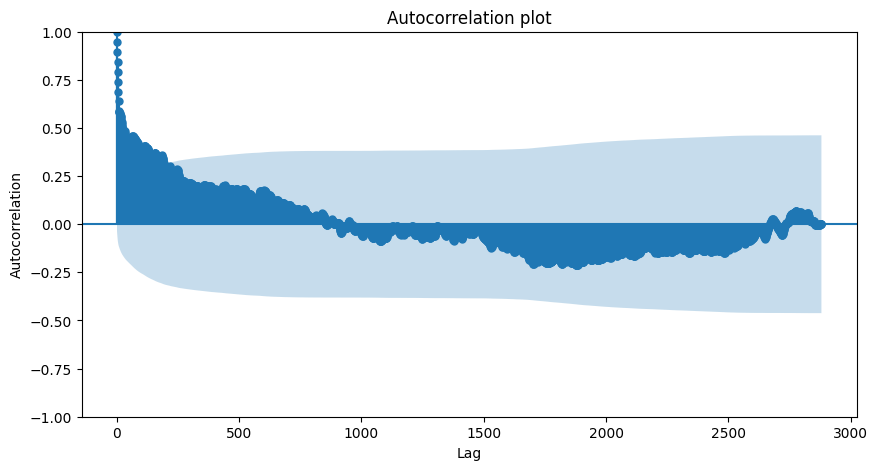

In [120]:
# Import packages
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


# Plot autocorrelation
plt.rc("figure", figsize=(10,5))
plot_acf(data['surfsara_power_usage'], lags=2880)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation plot')
plt.show()
